In [1]:
import os
import sys
import time
import warnings
import pandas as pd
import numpy as np
from pathlib import Path
import modin.pandas as md
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime
from matplotlib import cm

pd.set_option("display.float_format", "{:.6f}".format)
warnings.filterwarnings("ignore", ".*defaulting to pandas implementation.*")
notebook_dir = str(Path().resolve())
sys.path.append(str(Path().resolve().parent))
sys.path.append(str(Path().resolve().parent.parent))
h5_path = os.path.join(notebook_dir,'alphaVantage vanillas.h5')
store = pd.HDFStore(h5_path)
store.close()

In [2]:
from historical_av_key_collector import keys_df
keys_df

                            contract_key               raw_data_key  \
0     /date_2024_10_09/hottest_contracts  /date_2024_10_09/raw_data   
1     /date_2024_10_08/hottest_contracts  /date_2024_10_08/raw_data   
2     /date_2024_10_07/hottest_contracts  /date_2024_10_07/raw_data   
3     /date_2024_10_04/hottest_contracts  /date_2024_10_04/raw_data   
4     /date_2024_10_03/hottest_contracts  /date_2024_10_03/raw_data   
...                                  ...                        ...   
4195  /date_2008_01_08/hottest_contracts  /date_2008_01_08/raw_data   
4196  /date_2008_01_07/hottest_contracts  /date_2008_01_07/raw_data   
4197  /date_2008_01_04/hottest_contracts  /date_2008_01_04/raw_data   
4198  /date_2008_01_03/hottest_contracts  /date_2008_01_03/raw_data   
4199  /date_2008_01_02/hottest_contracts  /date_2008_01_02/raw_data   

                   surface_key               calibration_key  \
0     /date_2024_10_09/surface  /date_2024_10_09/calibration   
1     /date_2024_10

,contract_key,raw_data_key,surface_key,calibration_key,priced_securities_key,date
0,/date_2024_10_09/hottest_contracts,/date_2024_10_09/raw_data,/date_2024_10_09/surface,/date_2024_10_09/calibration,/date_2024_10_09/priced_securities,2024-10-09
1,/date_2024_10_08/hottest_contracts,/date_2024_10_08/raw_data,/date_2024_10_08/surface,/date_2024_10_08/calibration,/date_2024_10_08/priced_securities,2024-10-08
2,/date_2024_10_07/hottest_contracts,/date_2024_10_07/raw_data,/date_2024_10_07/surface,/date_2024_10_07/calibration,/date_2024_10_07/priced_securities,2024-10-07
3,/date_2024_10_04/hottest_contracts,/date_2024_10_04/raw_data,/date_2024_10_04/surface,/date_2024_10_04/calibration,/date_2024_10_04/priced_securities,2024-10-04
4,/date_2024_10_03/hottest_contracts,/date_2024_10_03/raw_data,/date_2024_10_03/surface,/date_2024_10_03/calibration,/date_2024_10_03/priced_securities,2024-10-03
...,...,...,...,...,...,...
4195,/date_2008_01_08/hottest_contracts,/date_2008_01_08/raw_data,NaN,NaN,NaN,NaT
4196,/date_2008_01_07/hottest_contracts,/date_2008_01_07/raw_data,NaN,NaN,NaN,NaT
4197,/date_2008_01_04/hottest_contracts,/date_2008_01_04/raw_data,NaN,NaN,NaN,NaT
4198,/date_2008_01_03/hottest_contracts,/date_2008_01_03/raw_data,NaN,NaN,NaN,NaT


# historical time-series

# calibrations

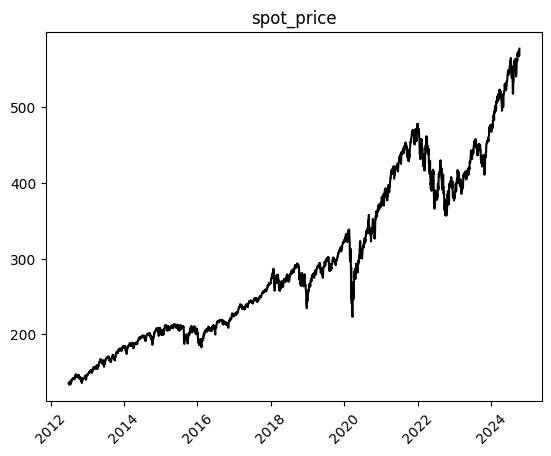

<Figure size 640x480 with 0 Axes>

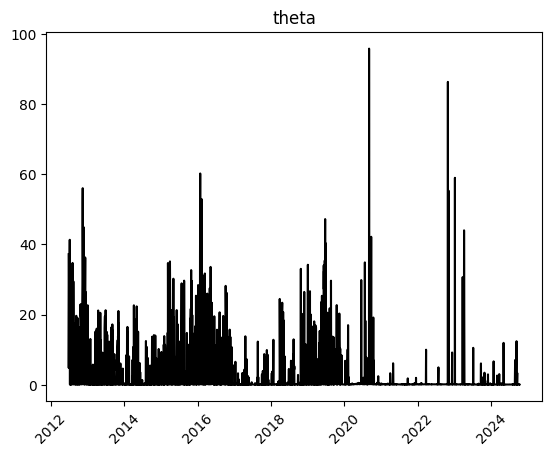

<Figure size 640x480 with 0 Axes>

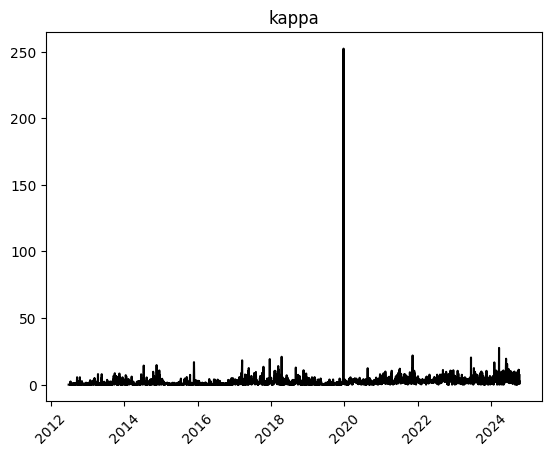

<Figure size 640x480 with 0 Axes>

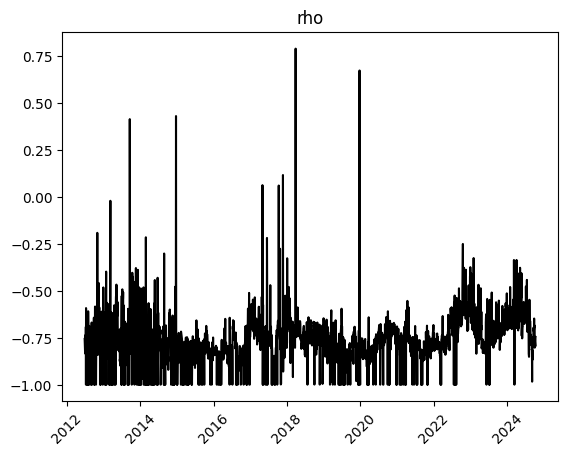

<Figure size 640x480 with 0 Axes>

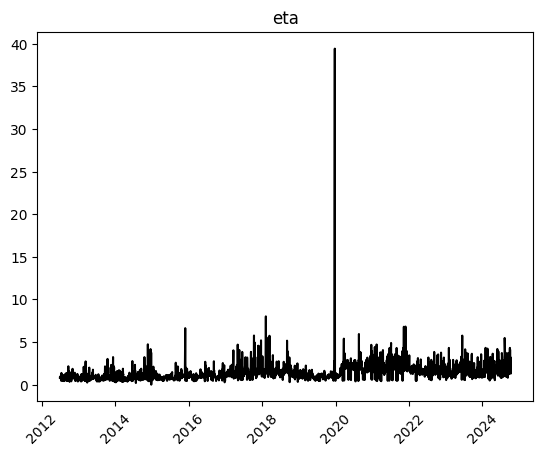

<Figure size 640x480 with 0 Axes>

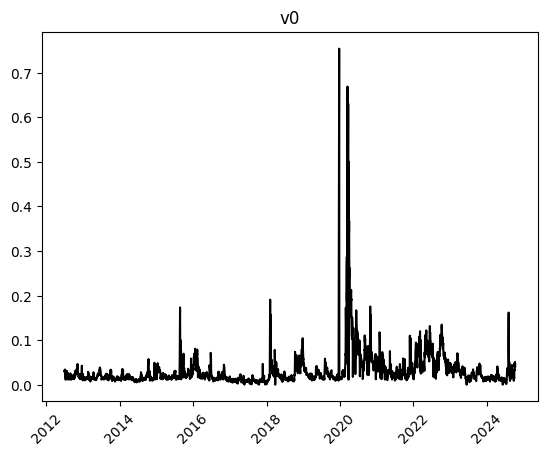


                    calculation_date   strike_price   market_price  \
count                        5775771 5775771.000000 5775771.000000   
mean   2019-08-04 18:14:39.587918848     298.706020      23.130845   
min              2012-06-28 00:00:00       5.000000       0.000000   
25%              2016-12-16 00:00:00     193.000000       0.140000   
50%              2020-04-22 00:00:00     280.000000       4.390000   
75%              2022-04-29 00:00:00     397.000000      23.530000   
max              2024-10-09 00:00:00    6400.000000     455.350000   
std                              NaN     138.421848      45.089668   

          volatility  days_to_maturity     spot_price  risk_free_rate  \
count 5775771.000000    5775771.000000 5775771.000000  5775771.000000   
mean        0.258053        111.846651     327.645802        0.040000   
min         0.000090         30.000000     133.510000        0.040000   
25%         0.149250         51.000000     225.040000        0.040000   
50%

<Figure size 640x480 with 0 Axes>

In [3]:
calibration_keys = keys_df.copy().dropna(subset='calibration_key')
calibrations = []
while True:
    try:
        store.open()
        for i,row in calibration_keys.iterrows():
            calibrations.append(store[row['calibration_key']])
        break
    except Exception as e:
        print(e)
        print('retrying in...')
        for i in range(2):
            print(2-i)
            time.sleep(1)
    finally:
        store.close()

calibrations = pd.concat(calibrations,ignore_index=True)
calibrations['calculation_date'] = pd.to_datetime(calibrations['calculation_date'],format='%Y-%m-%d')
calibrations = calibrations.set_index('calculation_date')
parameters = calibrations[['spot_price','theta','kappa','rho','eta','v0']].drop_duplicates()
for col in parameters.columns:
    plt.figure()
    plt.plot(calibrations[col], color='black')
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()
    plt.clf()
print(f"\n{calibrations.reset_index().describe()}")

In [4]:
problem = calibrations.copy()[calibrations['kappa']>50].reset_index()
problem_dates = problem['calculation_date']
problem_dates

0      2019-12-24
1      2019-12-24
2      2019-12-24
3      2019-12-24
4      2019-12-24
          ...    
2687   2019-12-24
2688   2019-12-24
2689   2019-12-24
2690   2019-12-24
2691   2019-12-24
Name: calculation_date, Length: 2692, dtype: datetime64[ns]

## cleaning invalid timestamps

# computed prices

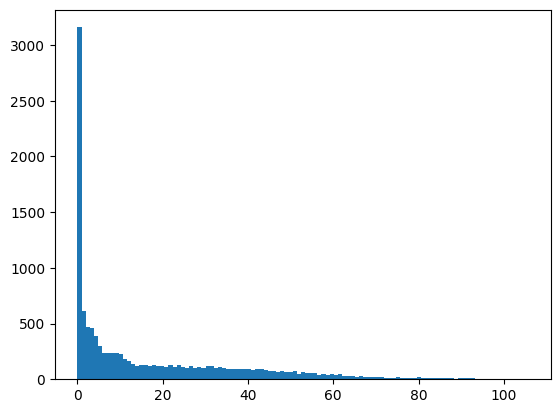

spot_price           float64
strike_price         float64
barrier              float64
days_to_maturity       int64
updown                object
outin                 object
w                     object
barrier_type_name     object
rebate               float64
dividend_rate        float64
risk_free_rate       float64
theta                float64
kappa                float64
rho                  float64
eta                  float64
v0                   float64
calculation_date      object
expiration_date       object
heston_vanilla       float64
barrier_price        float64
dtype: object
        spot_price  strike_price      barrier       rebate  dividend_rate  \
count 12000.000000  12000.000000 12000.000000 12000.000000   12000.000000   
mean    571.300000    571.300000   571.300000     0.000000       0.018000   
std       0.000000     33.651834   176.128575     0.000000       0.000000   
min     571.300000    514.170000   285.650000     0.000000       0.018000   
25%     571.300000   

<Figure size 640x480 with 0 Axes>

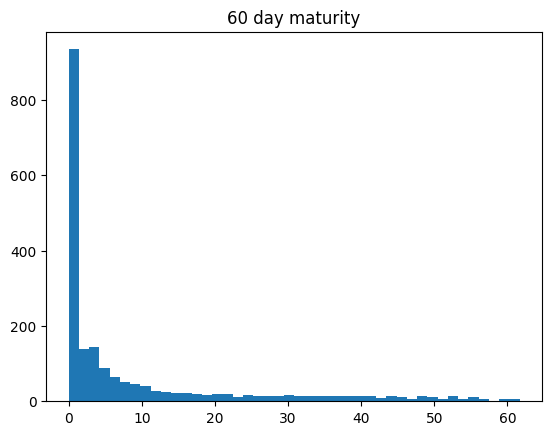

<Figure size 640x480 with 0 Axes>

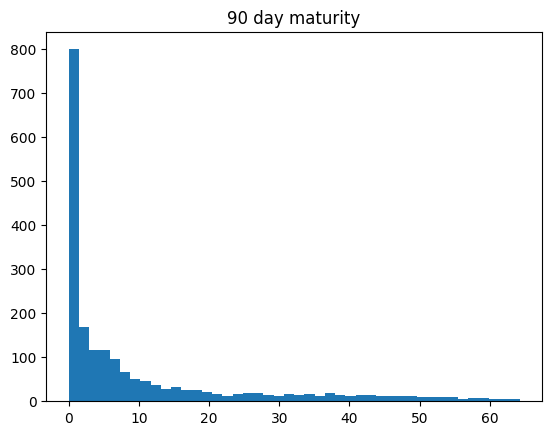

<Figure size 640x480 with 0 Axes>

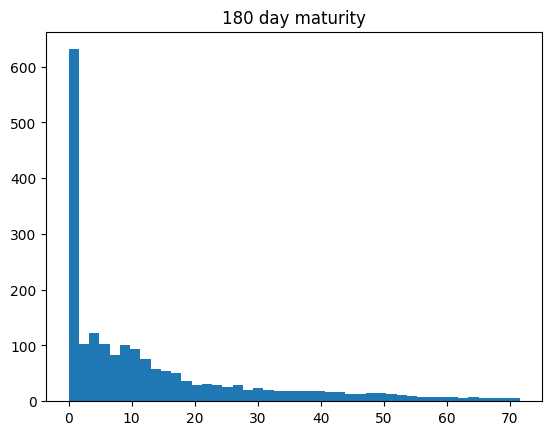

<Figure size 640x480 with 0 Axes>

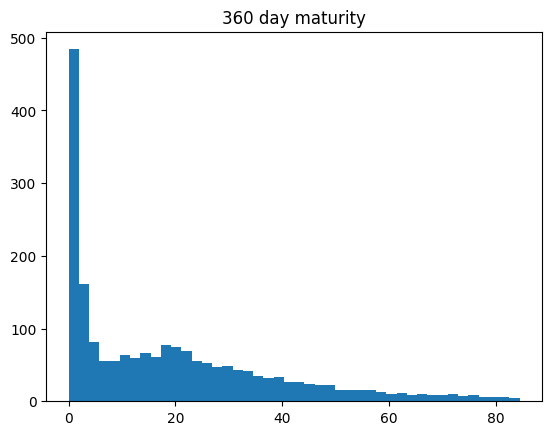

<Figure size 640x480 with 0 Axes>

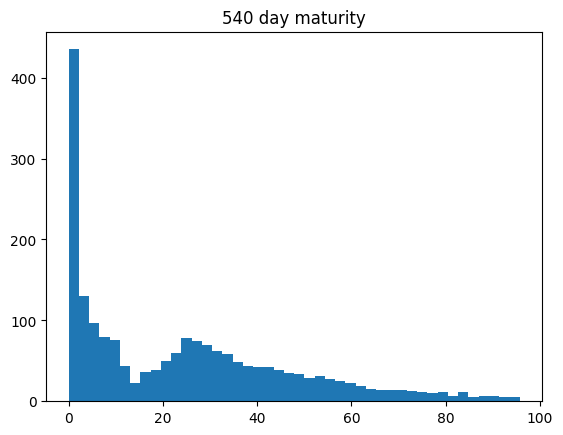

<Figure size 640x480 with 0 Axes>

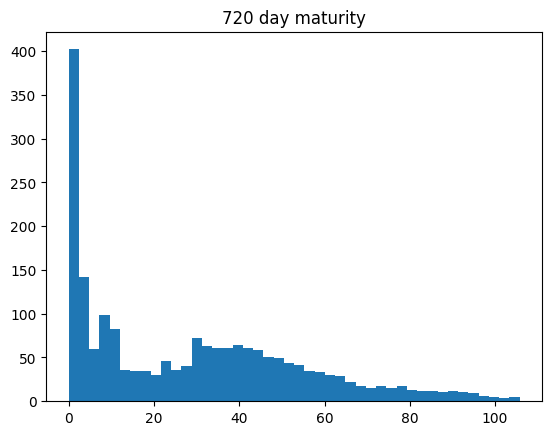

<Figure size 640x480 with 0 Axes>

In [5]:
prices_keys = keys_df.copy().dropna(subset='priced_securities_key')
while True:
    try:
        store.open()
        for i,row in prices_keys.iterrows():
            prices = store[row['priced_securities_key']]
        break
    except Exception as e:
        print(e)
        print('retrying in...')
        for i in range(2):
            print(2-i)
            time.sleep(1)
    finally:
        store.close()
plt.figure()
plt.hist(prices['barrier_price'],bins=int(prices.shape[0]**0.5))
plt.show()
plt.clf()

print(prices.dtypes)

W = prices['w'].unique().tolist()
btypes = prices['barrier_type_name'].unique().tolist()
T = prices['days_to_maturity'].unique().tolist()
pricesby_t = prices.set_index('days_to_maturity')
print(pricesby_t.describe())

for t in T:
    price_series = pricesby_t.loc[t,'barrier_price']
    plt.figure()
    plt.hist(price_series,bins = int((price_series.shape[0])**0.5))
    plt.title(f"{t} day maturity")
    plt.show()
    plt.clf()

# calibration error testing

[0]   Tuesday, 2019-12-24
                31       34       36       38       59       87       98   \
305.000000 0.161440 0.157790 0.159460 0.160530 0.158240 0.167080 0.167240   

                115      178      269      360  
305.000000 0.169070 0.175770 0.180500 0.187970  





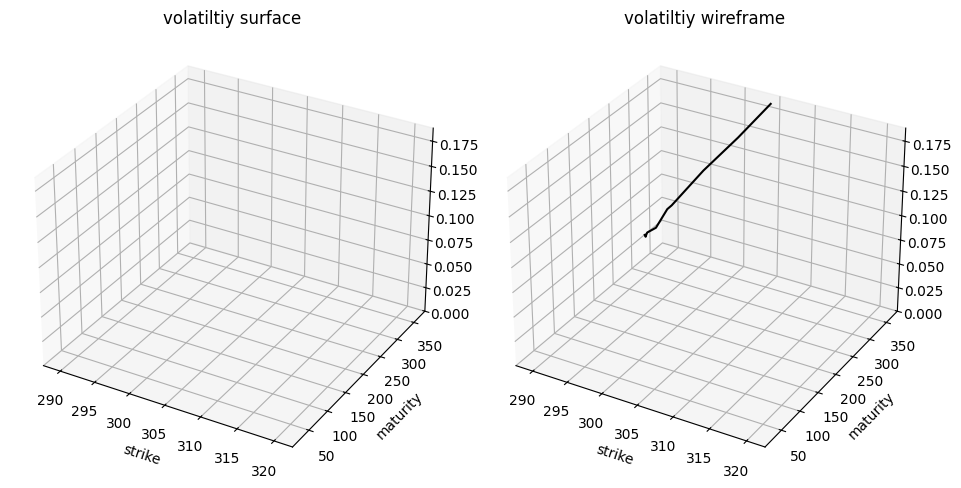

In [6]:
data=calibrations.copy()
data = data[data.index.isin(problem_dates)]
problem_dates = pd.to_datetime(problem_dates)
problem_keys = keys_df[keys_df['date'].isin(problem_dates)]

surfs = []
while True:
    try:
        store.open()
        j=0
        for i,row in problem_keys.iterrows():
            surf = store[row['surface_key']]
            surfs.append(surf)
            print(f"[{j}]   "+row['date'].strftime('%A, %Y-%m-%d'))
            print(surf)
            print('\n\n')
            j+=1
        break
    except Exception as e:
        print(e)
        print('retrying in...')
        for g in range(2):
            print(2-g)
    finally:
        store.close()

data = surfs[0]
T = data.columns.tolist()
K = data.index.tolist()

KK,TT = np.meshgrid(K,T)
VV = np.array(
        [[data.loc[k,t] for k in K] for t in T]
        )
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(KK, TT, VV, rstride=1, cstride=1, cmap=cm.magma, linewidth=0.1)


ax1.set_zlim(0, float(max(data.values.flatten())))
ax1.set_title('volatiltiy surface')
ax1.set_xlabel('strike')
ax1.set_ylabel('maturity')

# Second subplot for wireframe plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_wireframe(KK, TT, VV, rstride=1, cstride=1,color='black')
ax2.set_zlim(0, float(max(data.values.flatten())))
ax2.set_title('volatiltiy wireframe')
ax2.set_xlabel('strike')
ax2.set_ylabel('maturity')

plt.tight_layout()
plt.show()

## removal of problematic entries

In [7]:
problem_keys

,contract_key,raw_data_key,surface_key,calibration_key,priced_securities_key,date
1203,/date_2019_12_24/hottest_contracts,/date_2019_12_24/raw_data,/date_2019_12_24/surface,/date_2019_12_19/calibration,NaN,2019-12-24
